In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


# **LIBRARIES IMPORT**























> Importing necessary libraries

In [2]:
#importing libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
import statsmodels.api as sm 
from pandas_profiling import ProfileReport

# **LOADING THE DATASET**

In [3]:
#reading the dataset

df = pd.read_csv("../input/graduate-admissions/Admission_Predict.csv")

In [4]:
#displaying first 5 rows of the dataset

df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

**PROBLEM STATEMENT** : To predict the chances of admission of a candidate based on various factors such as scores (GRE,TOEFL and so on) - REGRESSION PROBLEM

To build a model that intakes all these 7 columns(features) to predict the chance of admit in the university--> target variable

# **DISPLAYING THE STATISTICS**

In [5]:
#displaying the statistics of the dataset

df.describe() 

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.340000  
25%      3.000000    8.170000    0.000000          0.640000  
50%      3.500000    8.610000    1.000000          0.730000  
75%      4.000000    9.062500    1.000000          0.830000  
max      5.000000    9.920000    1.000000          0.970000

# **CREATING A SUMMARY REPORT**

> **Pandas Profiling Report shows the entire summary report of the dataset in a detailed manner**

In [6]:
#ProfileReport gives a structured summary report of the DataFrame

from pandas_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
#showcasing the same report in a more structured manner

pf = ProfileReport(df)
pf.to_widgets()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   
5           6        330          115                  5  4.5   3.0  9.34   
6           7        321          109                  3  3.0   4.0  8.20   
7           8        308          101                  2  3.0   4.0  7.90   
8           9        302          102                  1  2.0   1.5  8.00   
9          10        323          108                  3  3.5   3.0  8.60   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
5         1              0.90  
6         1              0.75  
7         0              0.68  
8         0              0.50  
9         0              0.45

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
390         391        314          102                  2  2.0   2.5  8.24   
391         392        318          106                  3  2.0   3.0  8.65   
392         393        326          112                  4  4.0   3.5  9.12   
393         394        317          104                  2  3.0   3.0  8.76   
394         395        329          111                  4  4.5   4.0  9.23   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance of Admit   
390         0              0.64  
391         0              0.71  
392         1              0.84  
393         0              0.77  
394         1              0.89  
395         1              0.82  
396         1              0.84  
397         1              0.91  
398         0              0.67  
399         1              0.95

**INFERENCE from the report-**

* >**The following Columns -> GRE Score , TOEFL Score , University Rating (3 columns) have missing values that need to be handled**
* >**There are so many correlations (possibility of multi-collinearity) - also shown in Pearson graph**

# **FEATURE ENGINEERING**

# **HANDLING MISSING VALUES**

> **We are replacing the missing valued columns(GRE Score,TOEFL Score and University Rating) with their respective mean values(AVERAGE)**

In [8]:
#Handling Missing Values -- Taking the mean values and replacing the missing values with the mean calculated


df['GRE Score'] = df['GRE Score'].fillna(df['GRE Score'].mean())
df['TOEFL Score'] = df['TOEFL Score'].fillna(df['TOEFL Score'].mean())
df['University Rating'] = df['University Rating'].fillna(df['University Rating'].mean())


> **Checking if the missing values are handled**

In [9]:
#Checking if the Missing Values are handled

df.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.340000  
25%      3.000000    8.170000    0.000000          0.640000  
50%      3.500000    8.610000    1.000000          0.730000  
75%      4.000000    9.062500    1.000000          0.830000  
max      5.000000    9.920000    1.000000          0.970000

> **Now there are no missing values in any of the records in the dataset-- handled missing values**

In [10]:
#no missing values

df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**REMOVING UNWANTED COLUMN FROM THE DATASET**

In [11]:
#removing unwanted column - Serial Number column is unnecessary

df.drop(columns=['Serial No.'],inplace=True)

> **Displaying the final dataset**

In [12]:
#displaying first five rows of our final dataset

df.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

# **DATA VISUALIZATION**

> **Let us check how the data is distributed on every column in the dataset-in this way, we can check for skewness if any**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

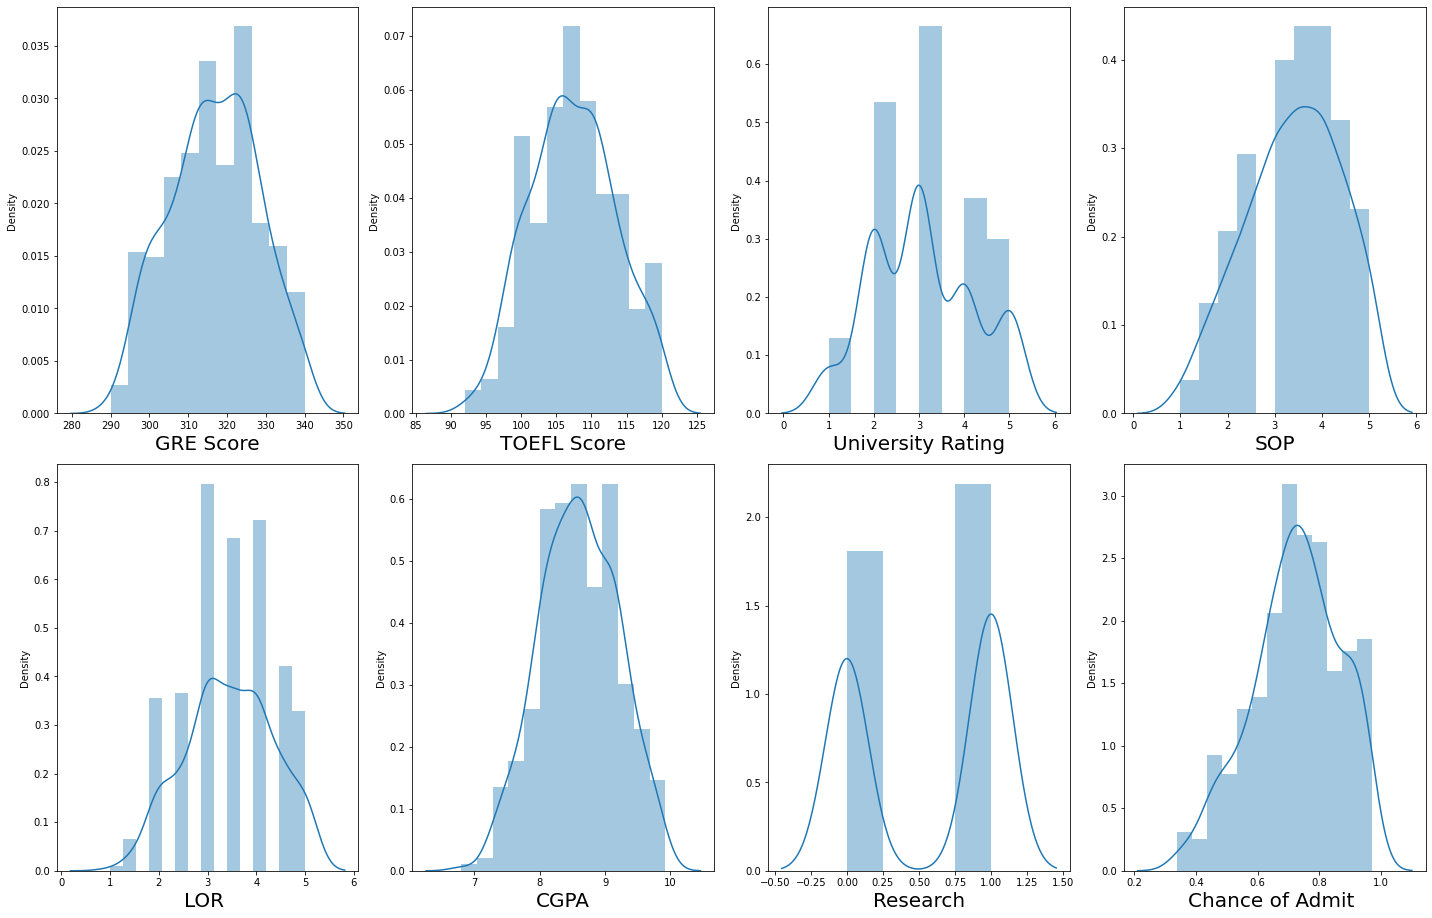

In [13]:
# data distribution on every column in the dataset
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

> There seems to be no skewness and the data distribution is good overall

# **FEATURE SELECTION**

> **From the dataset, we can infer that the 'Chance of Admit' column is the dependent variable while the rest of the features are independent variables**

In [14]:
#splitting the Label (Chance of Admit) and features

y = df['Chance of Admit ']
x = df.drop(columns=['Chance of Admit '])

In [15]:
#displaying the label values (Dependent Variable)

y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [16]:
#displaying the features (Independent Variables)

x

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
395        324          110                  3  3.5   3.5  9.04         1
396        325          107                  3  3.0   3.5  9.11         1
397        330          116                  4  5.0   4.5  9.45         1
398        312          103                  3  3.5   4.0  8.78         0
399        333          117                  4  5.0   4.0  9.66         1

[400 rows x 7 columns]

# **STANDARDIZATION**

**Scaling the values (such that the mean of the values becomes 0 and standard deviation become 1) so that all the values are in the same range so that the model can understand and build the relations better in a lower scale**

**WHY IS IT IMPORTANT?**

If the dataset dispersion is varying a lot, then the model we are trying to build will find it difficult to find the relations w.r.t both features & labels. Inorder to find a strong relation between both of them (features and label) Standardization is implemented

**IMPORTING LIBRARY**

> Importing Standard Scaler from the sklearn library

In [17]:
#importing StandardScaler from sklearn library

from sklearn.preprocessing import StandardScaler

**MODEL CREATION**

In [18]:
#Standard Scaler object creation

st_sc = StandardScaler()

> Fitting the model with x and storing it in an array

In [19]:
#fitting the model

arr = st_sc.fit_transform(x) 

> Coverting the array to a dataframe for simplicity

In [20]:
#converting the array to a dataframe

pd.DataFrame(arr)

0         1         2         3         4         5         6
0    1.762107  1.746971  0.798829  1.093864  1.167321  1.764818  0.909112
1    0.627656 -0.067635  0.798829  0.596653  1.167321  0.455151  0.909112
2   -0.070467 -0.562528 -0.076600 -0.397769  0.052933 -1.005631  0.909112
3    0.453126  0.427257 -0.076600  0.099442 -1.061454  0.119339  0.909112
4   -0.244998 -0.727492 -0.952029 -1.392191 -0.504260 -0.653029 -1.099975
..        ...       ...       ...       ...       ...       ...       ...
395  0.627656  0.427257 -0.076600  0.099442  0.052933  0.740592  0.909112
396  0.714922 -0.067635 -0.076600 -0.397769  0.052933  0.858126  0.909112
397  1.151249  1.417042  0.798829  1.591075  1.167321  1.429006  0.909112
398 -0.419528 -0.727492 -0.076600  0.099442  0.610127  0.304036 -1.099975
399  1.413045  1.582006  0.798829  1.591075  0.610127  1.781609  0.909112

[400 rows x 7 columns]

> Dispalying the final list of columns of the dataset

In [21]:
#let us compare by generating a report

df1 = pd.DataFrame(arr)
df1.profile_report()

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

> All graphs have zero mean - shifted to a lower scale

In [22]:
#final columns

df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

> Now creating a Dataframe df1 along with the column names

In [23]:
#creating a new DataFrame df1 and renaming all the columns for better readability

df1 = pd.DataFrame(arr, columns= ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'])

In [24]:
#displaying the statistical info of the final dataframe

df1.describe()

GRE Score   TOEFL Score  University Rating           SOP  \
count  4.000000e+02  4.000000e+02       4.000000e+02  4.000000e+02   
mean  -3.785861e-16  5.412337e-16       7.147061e-16  1.859624e-16   
std    1.001252e+00  1.001252e+00       1.001252e+00  1.001252e+00   
min   -2.339367e+00 -2.542098e+00      -1.827457e+00 -2.386613e+00   
25%   -7.685900e-01 -7.274920e-01      -9.520286e-01 -8.949798e-01   
50%    1.679859e-02 -6.763531e-02      -7.660001e-02  9.944220e-02   
75%    7.149218e-01  7.571856e-01       7.988286e-01  5.966532e-01   
max    2.023903e+00  2.076899e+00       1.674257e+00  1.591075e+00   

                LOR          CGPA      Research  
count  4.000000e+02  4.000000e+02  4.000000e+02  
mean  -3.019807e-16  8.076873e-16  2.942091e-17  
std    1.001252e+00  1.001252e+00  1.001252e+00  
min   -2.733036e+00 -3.020504e+00 -1.099975e+00  
25%   -5.042604e-01 -7.201909e-01 -1.099975e+00  
50%    5.293342e-02  1.859559e-02  9.091117e-01  
75%    6.101273e-01  7.783704e-01  9.091117e-01  
max    1.724515e+00  2.218165e+00  9.091117e-01

# **MULTICOLLINEARITY CHECK**

**Checking if the features are collinear with each other - if Multicollinearity exists, we need to remove those columns (using VIF)**

**VIF  is a measure used to find the multi-collinearity(relationship between features). The features with VIF score more than 10 (VIF>10) can be eliminated [these features are not going to contribute since they have relationship between themselves and not with the target]**

VIF = (1/1-r^2)

where, r = residual

In [25]:
#Importing VIF from statsmodel library

from statsmodels.stats.outliers_influence import variance_inflation_factor   #importing Variance Inflation Factor

> displaying the array already created

In [26]:
#displaying the array of values

arr

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

**PERFORMING VIF FOR MULTICOLLINEARITY CHECK**

> **Variance Inflation Factor gives a VIF score for each columns in the dataset and the columns with VIF scoe above 10 must be eliminated - means those columns are collinear with each other which would not contribute much value to the model**

In [27]:
#number of rows and columns of the array

arr.shape

(400, 7)

> Let us extract the 400 rows using a for loop

In [28]:
# VIF on the array values

[variance_inflation_factor(arr,i) for i in range(arr.shape[1])]

[4.615516166781608,
 4.288959013746899,
 2.9196056618253414,
 3.075503721954348,
 2.431258484869441,
 5.207402545736424,
 1.5433119011502878]

> Creating a Dataframe to store these array values

In [29]:
#Creating a dataframe to store the VIF values of the features

df2 = pd.DataFrame()
df2['vif'] = [variance_inflation_factor(arr,i) for i in range(arr.shape[1])] 
df2

vif
0  4.615516
1  4.288959
2  2.919606
3  3.075504
4  2.431258
5  5.207403
6  1.543312

> Adding the column values to the dataframe for better readability

In [30]:
#Displaying the VIF values for each feature in the  dataset

df2['features'] = x.columns
df2

vif           features
0  4.615516          GRE Score
1  4.288959        TOEFL Score
2  2.919606  University Rating
3  3.075504                SOP
4  2.431258               LOR 
5  5.207403               CGPA
6  1.543312           Research

>**NO MULTI-COLLINEARITY**--> As the VIF score of all features are below 10 , no features are eliminated. The model can be created with all features.

# **TRAIN TEST SPLIT**

**Splitting the dataset into training and the testing set where test size =10 - means train set takes 10% while the test set takes the rest-90% for model testing**

**WHY IS IT IMPORTANT?**

Testing our model on the training set itself does not give a good result since that set is known to the model(model is built upon using that only) - hence splitting the dataset into a test set and then testing our model on the test set improves model accuracy

In [31]:
#importing train test split from sklearn library

from sklearn.model_selection import train_test_split

In [32]:
#Performing Train Test Split on the dataset

x_train, x_test, y_train, y_test = train_test_split(arr,y,test_size=10,random_state=1000) #random state--> makes a fixed random and gives the same result when called any number of times

# **LINEAR REGRESSION**

**IMPORTING LINEAR REGRESSION LIBRARY**

In [33]:
#importing Linear Regression from sklearn library

from sklearn.linear_model import LinearRegression

**MODEL CREATION**

In [34]:
#building a Linear Regression Model

lr = LinearRegression()

**FITTING THE MODEL**

In [35]:
#fitting and training the model on Linear Regression

lr.fit(x_train,y_train)

LinearRegression()

In [36]:
#co-efficient - m values

lr.coef_

array([ 0.01837332,  0.01880078,  0.00765448, -0.00506158,  0.02055639,
        0.07115528,  0.01247125])

In [37]:
#intercept - c value

lr.intercept_ 

0.7241889452597708

**MODEL PREDICTION**

In [38]:
df.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

> **Let us take the 1st record in the dataset and check if we get the 'Chance of Admit' close to 0.92 (expected)**

In [39]:
#performing the prediction

lr.predict([[337.000000,118.0,4.0,4.5,4.5,9.65,1]])  #first record

array([9.9339542])

> **Our model has predicted 9.93 which is not as expected. The reason is we have not yet performed scaling on the prediction-Let us perform Standard Scaling**

# **STANDARDIZATION**

> Standardisation is performed to bring all the values to the same range, for easier manipulation

In [40]:
# standardization of prediction is done

lr.predict(st_sc.transform([[337.000000,118.0,4.0,4.5,4.5,9.65,1]]))

array([0.95089684])

> **Our model prediction value is 0.95, but expected value is only 0.92 . So this is a better score**

**ACCURACY SCORE**

> Let us find out our model accuracy

In [41]:
#calculating accuracy score of the test set - R squared (R^2)

lr.score(x_test,y_test)

0.8223260599056978

> **Our model has a good accuracy of 82% accuracy score**

# **ADJUSTED R SQUARED**

adjusted R squared = 1-(1-r2)*(n-1)/(n-p-1)

In [42]:
# creating a function for Adjusted R squared
    
def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [43]:
#adjusted r2 score

adj_r2(x_train,y_train)

0.7992038930435955

> **The adjusted r2 score of our model is 79%**

# **REGULARIZATION**

**Regularization helps in dealing with overfitting (train accuracy more & test accuracy is less) by controlling the error terms(y-^y)**

*Controlling Em or Ec in the calculation of mnew/cnew inorder to genealize model in the best possible way*

**TYPES**-

1.**Lasso Regression** (Least Absolute Shrinkage and Selection Operator) - L1 regularization changes based only on the previous changes accordingly in that ratio

***L1 = RSS + (lambda) (summation 1-j) |beta j|***
where, 
RSS = (y-^y)^2
lamda = shrinkage factor (controlling the changes in error (RSS) by adding some factors (where beta is m)

2.**Ridge Regression** - L2 regularization is same as L1 except it squares the m value-penalty higher so gives high impact (when m is very very less not much of a changes will be afected in L1 so penalty is less hence we use L2) 

***L2 = RSS + (lambda) (summation 1-j) |beta^2 j|***
where, 
RSS = (y-^y)^2
lamda = shrinkage factor (controlling the changes in error (RSS) by adding some factors (where beta is m)

3.**ElasticNet** - Combination of both L1(lasso) and L2(ridge) regression

***ElasticNet = (y-^y)^2/2n + (lambda)((1-alpha)/2) (summation) |beta^2| + alpha (summation) |beta|***
where,
alpha = mixing parameter between ridge and lasso
1st part = RSS (like)
2nd part = L2 (like) 
3rd part = L1(like)

**IMPORTING LIBRARY**

In [44]:
#importing regularization models from sklearn library

from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV

**1.L1 MODEL BUILDING**

In [45]:
#LassoCV with cross validation used to find the best parameter (dataset has been split into 10 sets equally with 9 for train and 1 for test in rotation)

lassocv = LassoCV(alphas=None,cv=10,max_iter=2000000,normalize=True)
lassocv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=2000000, normalize=True)

In [46]:
#alpha value - (lambda value in the equation)

lassocv.alpha_

6.783089825650628e-05

In [47]:
#lasso

lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(x_train,y_train)

Lasso(alpha=6.783089825650628e-05)

**MODEL ACCURACY**

In [48]:
#model accuracy

lasso.score(x_test,y_test)

0.8240204587016213

> **Accuracy of model is 82%**

**2.L2 MODEL BUILDING**

In [51]:
#RidgeCV model building with 10cv

ridgecv = RidgeCV(alphas=(0.1,1.0,10.0),cv = 10,normalize=True
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, normalize=True)

In [52]:
#alpha value

ridgecv.alpha_

0.1

In [53]:
#rebuilding the model to change the alpha value

ridgecv = RidgeCV(alphas=np.random.uniform(0,10,50),cv = 10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([6.08212402, 6.01329366, 8.13034586, 9.45996762, 5.75845103,
       1.45870413, 1.78589278, 6.64808185, 9.20915248, 8.02093337,
       4.32185402, 1.86470665, 6.78140137, 4.94736412, 8.43130731,
       2.57215377, 4.89725467, 0.4349261 , 9.25378145, 1.69204606,
       3.21501161, 0.05026   , 2.05471555, 1.86459699, 7.81333608,
       8.00358965, 1.68994691, 5.55712426, 4.74619733, 2.24738646,
       4.23945723, 5.85469996, 2.33579197, 0.36759491, 5.30284058,
       9.62452507, 2.19424593, 1.43091131, 3.81365253, 5.0130038 ,
       0.51284074, 0.35850555, 0.86838979, 9.26668616, 9.37338543,
       9.46665531, 4.60256747, 1.46803249, 8.35927663, 2.30512168]),
        cv=10, normalize=True)

In [54]:
#better alpha value

ridgecv.alpha_

0.050259997062791495

In [56]:
#ridge

ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(x_train,y_train)

Ridge(alpha=0.050259997062791495)

In [57]:
#model accuracy

ridge.score(x_test,y_test)

0.8223687838306794

> Model accuracy is 82% 

**Our model accuracy with both Ridge and Lasso is far better than Normal Linear Regression**

**3. ELASTIC MODEL BUILDING**

In [61]:
#elastic model building with same 10 cv

elasticcv = ElasticNetCV(alphas=None,cv=10)
elasticcv.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [62]:
#alpha value

elasticcv.alpha_

0.002505065202666664

In [63]:
#l1 ratio - lambda value

elasticcv.l1_ratio_

0.5

In [64]:
#elastic model building

elastic = ElasticNet(alpha=elastic.alpha_,l1_ratio=elastic.l1_ratio_)
elastic.fit(x_train,y_train)

ElasticNet(alpha=0.002505065202666664)

In [67]:
#model accuracy

elastic.score(x_test,y_test)

0.8418038715447063

> **Elastic model accuracy is 84% which is far better than both ridge and lasso regression**

**PLEASE UPVOTE IF YOU LIKED THE CONTENT :)**